In [1881]:
# Imports
import math
import random
import pandas as pd
from heapq import heapify, heappush, heappop # This is for the min heap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np # probably not necessary, but is used for initializing the edge and weights
import sys # used for setting the costs to inf (could be replaced with just using a really large number)
import time # used to get the runtime of the algorithm
from matplotlib import pyplot as plt # used to graph the path taken
import cvxpy as cp #CVX program

In [1882]:
# Set up variables for DataCenter
numNodes = 18
edgeMatrix = np.zeros(shape = [numNodes, numNodes], dtype = int)
weightMatrix = np.zeros(shape = [numNodes, numNodes], dtype = float)
nodes = []
nodeCounter = 0
nodeCost = []
explored = [False] * numNodes
openList = []

In [1883]:
#Mapping Node to reallocate the workload to other nodes
mappingNode = {
    "MappingNode1": [18, 12],
    "MappingNode2": [10, 12],
    "MappingNode3": [1, 12]
}

In [1884]:
# defines coordinates of each data center as a big node (K=4)
dataCenter = {
    "DataCenter1": [18, 25],
    "DataCenter2": [10, 25],
    "DataCenter3": [1, 25], 
}


In [1885]:
smallNode = {
    "Node1": [25, 25],
    "Node2": [23, 25],
    "Node3": [21, 25],
    "Node4": [19, 25],
    "Node5": [17, 25],
    "Node6": [15, 25],
    "Node7": [13, 25],
    "Node8": [11, 25],
    "Node9": [9, 25],
    "Node10": [7, 25],
    "Node11": [5, 25],
    "Node12": [2, 25]
}

In [1886]:
# Node class
class Node(): # defining nodes
    nodeID = -1
    xCoord = 0
    yCoord = 0
    weight = 0
    prevNode = None
    isDataCenter = False
    isDataCenter1 = False 
    isDataCenter2 = False
    isDataCenter3 = False
    isMappingNode = False
    isCost = False
    
    # instantiate a node with given coordinates
    def __init__ (self, xCoord, yCoord, weight):
        global nodeCounter
        self.xCoord = xCoord
        self.yCoord = yCoord
        self.weight = weight
        self.nodeID = nodeCounter
        nodeCounter += 1
    
    # used for less than comparisons (min heap)
    def __lt__(self, other):
        global nodeCost
        if nodeCost[self.nodeID] < nodeCost[other.nodeID]:
            return True
        else:
            return False
        
    # keep track of what node you came from
    def setPrevNode(self, node):
        self.prevNode = node
        
    # set as MappingNode to be used and plotted.
    def setMappingNode(self):
        self.isMappingNode = True
    
    # set as DataCenter to be plotted.
    def setDataCenter(self):
        self.isDataCenter = True
    
    # set as DataCenter to be used.
    def setDataCenter1(self):
        self.isDataCenter1 = True

    # set as DataCenter to be used.
    def setDataCenter2(self):
        self.isDataCenter2 = True
        
    # set as DataCenter to be used.
    def setDataCenter3(self):
        self.isDataCenter3 = True
        
    def setCost(self):
        self.isCost = True
        
    # set as smaller nodes to be use
    #def setSmallNode(self):
        #self.isSmallNode = True


In [1887]:
# defining the dataCenter cost from each node
def edgeCost(): #DataCenter cost
    power = np.random.randint(low = 0, high = 50, size=(12,))
    bandwidth = np.random.randint(low = 0, high = 500, size = (12,))
    total = power + bandwidth
    return total

In [1888]:
nodeCost = edgeCost()
nodeCost

array([ 41, 171, 413, 477, 362, 175, 226,  30, 170, 377, 368, 433])

In [1889]:
zeroMatrix = np.zeros(6)

In [1890]:
nodeCost = np.concatenate((nodeCost,zeroMatrix), axis = None)
nodeCost

array([ 41., 171., 413., 477., 362., 175., 226.,  30., 170., 377., 368.,
       433.,   0.,   0.,   0.,   0.,   0.,   0.])

In [1891]:
node1 = (Node(smallNode['Node1'][0],smallNode['Node1'][1],nodeCost[0]))
node1.setDataCenter1()

node2 = (Node(smallNode['Node2'][0],smallNode['Node2'][1],nodeCost[1]))
node2.setDataCenter1()

node3 = (Node(smallNode['Node3'][0],smallNode['Node3'][1],nodeCost[2]))
node3.setDataCenter1()

node4 = (Node(smallNode['Node4'][0],smallNode['Node4'][1],nodeCost[3]))
node4.setDataCenter1()

node5 = (Node(smallNode['Node5'][0],smallNode['Node5'][1],nodeCost[4]))
node5.setDataCenter2()

node6 = (Node(smallNode['Node6'][0],smallNode['Node6'][1],nodeCost[5]))
node6.setDataCenter2()

node7 = (Node(smallNode['Node7'][0],smallNode['Node7'][1],nodeCost[6]))
node7.setDataCenter2()

node8 = (Node(smallNode['Node8'][0],smallNode['Node8'][1],nodeCost[7]))
node8.setDataCenter2()

node9 = (Node(smallNode['Node9'][0],smallNode['Node9'][1],nodeCost[8]))
node9.setDataCenter3()

node10 = (Node(smallNode['Node10'][0],smallNode['Node10'][1],nodeCost[9]))
node10.setDataCenter3()

node11 = (Node(smallNode['Node11'][0],smallNode['Node11'][1],nodeCost[10]))
node11.setDataCenter3()

node12 = (Node(smallNode['Node12'][0],smallNode['Node12'][1],nodeCost[11]))
node12.setDataCenter3()

mappingNode1 = (Node(mappingNode['MappingNode1'][0],mappingNode['MappingNode1'][1],nodeCost[12]))
mappingNode1.setMappingNode()

mappingNode2 = (Node(mappingNode['MappingNode2'][0],mappingNode['MappingNode2'][1],nodeCost[13]))
mappingNode2.setMappingNode()

mappingNode3 = (Node(mappingNode['MappingNode3'][0],mappingNode['MappingNode3'][1],nodeCost[14]))
mappingNode3.setMappingNode()

dataCenter1 = (Node(dataCenter['DataCenter1'][0],dataCenter['DataCenter1'][1],nodeCost[15]))
dataCenter1.setDataCenter()

dataCenter2 = (Node(dataCenter['DataCenter2'][0],dataCenter['DataCenter2'][1],nodeCost[16]))
dataCenter2.setDataCenter()

dataCenter3 = (Node(dataCenter['DataCenter3'][0],dataCenter['DataCenter3'][1],nodeCost[17]))
dataCenter3.setDataCenter()

In [1892]:
nodes.append(node1)
nodes.append(node2)
nodes.append(node3)
nodes.append(node4)
nodes.append(node5)
nodes.append(node6)
nodes.append(node7)
nodes.append(node8)
nodes.append(node9)
nodes.append(node10)
nodes.append(node11)
nodes.append(node12)
nodes.append(mappingNode1)
nodes.append(mappingNode2)
nodes.append(mappingNode3)
nodes.append(dataCenter1)
nodes.append(dataCenter2)
nodes.append(dataCenter3)
nodes

In [1893]:
cost_DC1 = 0
cost_DC2 = 0
cost_DC3 = 0

for i in range (numNodes):
    if nodes[i].isDataCenter1:
        cost_DC1 += nodes[i].weight

for i in range (numNodes):
    if nodes[i].isDataCenter2:
        cost_DC2 += nodes[i].weight

for i in range (numNodes):
    if nodes[i].isDataCenter3:
        cost_DC3 += nodes[i].weight

print(cost_DC1)
print(cost_DC2)
print(cost_DC3)

1102.0
793.0
1348.0


In [1894]:
def newCost():
    updatedCost = edgeCost()
    newDataCenter1 = updatedCost[0] + updatedCost[1] + updatedCost[2] + updatedCost[3]
    newDataCenter2 = updatedCost[4] + updatedCost[5] + updatedCost[6] + updatedCost[7]
    newDataCenter3 = updatedCost[8] + updatedCost[9] + updatedCost[10] + updatedCost[11]
    updatedCost = [newDataCenter1, newDataCenter2, newDataCenter3]
    return updatedCost

In [1895]:
import csv #Testing the use of csv file. It is not yet implemented in the code.

Cost_T1 = newCost()
Cost_T2 = newCost()
Cost_T3 = newCost()
Cost_T4 = newCost()
Cost_T5 = newCost()
Cost_T6 = newCost()
Cost_T7 = newCost()
Cost_T8 = newCost()
Cost_T9 = newCost()
Cost_T10 = newCost()

cost_df = [['cost','time_slot'],
           [Cost_T1[0], 0],
           [Cost_T1[1], 0],
           [Cost_T1[2], 0],
           [Cost_T2[0], 1],
           [Cost_T2[1], 1],
           [Cost_T2[2], 1],
           [Cost_T3[0], 2],
           [Cost_T3[1], 2],
           [Cost_T3[2], 2],
           [Cost_T4[0], 3],
           [Cost_T4[1], 3],
           [Cost_T4[2], 3],
           [Cost_T5[0], 4],
           [Cost_T5[1], 4],
           [Cost_T5[2], 4],
           [Cost_T6[0], 5],
           [Cost_T6[1], 5],
           [Cost_T6[2], 5],
           [Cost_T7[0], 6],
           [Cost_T7[1], 6],
           [Cost_T7[2], 6],
           [Cost_T8[0], 7],
           [Cost_T8[1], 7],
           [Cost_T8[2], 7],
           [Cost_T9[0], 8],
           [Cost_T9[1], 8],
           [Cost_T9[2], 8],
           [Cost_T10[0], 9],
           [Cost_T10[1], 9],
           [Cost_T10[2], 9]
          ]
        
with open('CostData.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter='|')
    writer.writerows(cost_df)

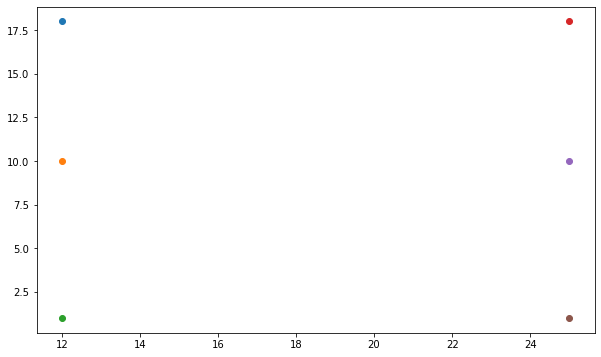

In [1896]:
for i in range(numNodes):
    if nodes[i].isDataCenter or nodes[i].isMappingNode:
        plt.plot(nodes[i].yCoord, nodes[i].xCoord, marker = "o") 

In [1897]:
node_direction = [1,-1]
A = random.choice(node_direction)
A

-1

In [1898]:
b = ([nodes[15].weight,nodes[16].weight,nodes[17].weight])
b 

[0.0, 0.0, 0.0]

In [1899]:
Cost_T0 = ([cost_DC1, cost_DC2, cost_DC3])
Cost_T0

[1102.0, 793.0, 1348.0]

In [1900]:
#Algorithm to allocate resources given cost function
def resourceAllocate_1(dataCenterCost):
    #Use of Linear Programming to minimize the cost for resource allocation
    #Using CVX in Python
    
    #node_direction = [-1,1]
    node_direction = [-1]
    #We are keeping the workload as always sending to not back up the network; nodes on receiving 
    #workload continuously at random will increase conjestion and optimization will be impossible
    workload_treated = [-1,1] #Workload is shown as treated always so it is not used
    A = random.choice(node_direction) #Connection entering or leaving node
    b = np.zeros(len(dataCenterCost))
    
    for i in range (len(dataCenterCost)):
        b[i] = nodes[i + 12].weight + dataCenterCost[i] #exogenous workload to be reallocated
    
    # Construct the problem.
    x = cp.Variable(len(b))
    #objective = cp.Minimize(cp.sum(calculate_scalar(K_Data_Center_Predict, Mapping_Nodes_J, theta)))
    objective = cp.Minimize(cp.sum(x))
    #constraints = [0 <= x, x <= 1]
    constraints = [cp.sum(A*x + b) <= 0, 0 <= x[0], 0 <= x[1], 0 <= x[2], x[0] <= 2000, x[1] <= 4000, x[2] <= 1500]
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Print result.
    print("\nThe optimal value is", prob.value)
    print("A solution x is")
    print(x.value) 
    return prob.value, x.value

In [1901]:
#Algorithm to allocate resources given cost function with updated parameters
def resourceAllocate_2(dataCenterCost):
    #Use of Linear Programming to minimize the cost for resource allocation
    #Using CVX in Python
    
    node_direction = [-1,1]
    workload_treated = [-1,1]
    A = random.choice(node_direction) #Connection entering or leaving node
    y = random.choice(workload_treated)
    b = np.zeros(len(dataCenterCost))
    x_max = np.zeros(len(dataCenterCost))
    
    for i in range (len(dataCenterCost)):
        b[i] = nodes[i + 12].weight + dataCenterCost[i] #exogenous workload to be reallocated
    
    # Construct the problem.
    x = cp.Variable(len(b))
    #objective = cp.Minimize(cp.sum(calculate_scalar(K_Data_Center_Predict, Mapping_Nodes_J, theta)))
    objective = cp.Minimize(cp.sum(x))
    #constraints = [0 <= x, x <= 1]
    for i in range((len(b))):
        if x_max[i] < b[i]:
            x_max[i] = b[i] 
    constraints = [cp.sum(A*x + b) <= 0, 0 <= x[0], 0 <= x[1], 0 <= x[2], 
                   x[0] <= x_max[0], x[1] <= x_max[1], x[2] <= x_max[2]]
    prob = cp.Problem(objective, constraints)
    
    if A < 0: #If the link is sending
        prob.solve()

        # Print result.
        print("\nThe optimal value is", prob.value)
        print("A solution x is")
        print(x.value) 
        
        for i in range(len(b)):
            nodes[i + 12].weight = b[i] + nodes[i + 12].weight #b[i] queues workload into mapping nodes, adds leftovers
            b[i] = b[i] - x[i].value #Workload is scheduled into x[i] to take away from mapping nodes, b[i] is leftovers
            if b[i] <= 0: #If the workload taken off is more than in the queue, the queue will be set to zero instead of
                b[i] = 0  #going into the negatives.
            nodes[i + 15].weight = x[i].value + nodes[i + 15].weight #dataCenter Nodes receives weights distributed by CVX optimi
            nodes[i + 12].weight = b[i] #Mapping node is updated by any left over b[i]
            if y < 0: #If y < 0: The workload is counted as treated and weights reset. If not, they are left queued.
                nodes[i + 15].weight = 0 
                nodes[i + 12].weight = 0
            
    elif A > 0: #If the link is receiving 
        node_weight = []
        added_weight = 0
        for i in range(len(b)): 
            nodes[i + 12].weight = nodes[i + 12].weight + b[i] #Workload scheduled is added to the queue for mappingData
            added_weight = nodes[12].weight + nodes[13].weight + nodes[14].weight
            node_weight.append(nodes[12].weight)
            node_weight.append(nodes[13].weight)
            node_weight.append(nodes[14].weight)
            return added_weight, node_weight #Returns the untreated workload split since it is ingoing.
    return prob.value, x.value #If link was sending, then return optimization values

In [1902]:
def calculate_scalar(X, Y, theta, M): #Declaring values and computing the Scalar value J
#loss is calculated by taking the mean of squared differences between actual(target) and predicted values. 
    predictions = X.dot(theta)  #Dot product of array X and theta
    errors = np.subtract(predictions,Y) #Matrix subtraction with predictions and Y
    squaringErrors = np.square(errors) #Now errors contained in matrix. We square all values in matrix error.
    J = 1/(2*M)*np.sum(squaringErrors) #Scalar equation using matrix squErrors
    return J

In [1903]:
def gradient_descent(X, Y, theta, alpha, iterations, M):  #Function to calculate gradient descent for linear regression
    
    result = np.zeros(iterations)   #creating a row of an array with an undetermined amount of zeroes.
    theta_interval = np.zeros([iterations, theta.size])  #creating an array for each interval to be plotted (X1, X2, X3) 
    
    for i in range(iterations):    #For loop with iterations as an input.
        predictions = X.dot(theta)   #Dot product of array X and theta resulting in scalar
        errors = np.subtract(predictions,Y) #Matrix subtration between predictions and value Y
        sum_delta = (alpha/M)*X.transpose().dot(errors); #learning rate over training examples * scalar of resulting dot product.  
        theta = theta-sum_delta;   #Current theta minus scalar sum_delta for final value of theta                      
        result[i] = calculate_scalar(X, Y, theta, M)
        theta_interval[i] = theta #Needed to show the previous thetas used for the resulting scalar.

    return theta, result, theta_interval

In [1904]:
#Running the algorithm with input of time_slot
time_slot = 500

X_1 = np.zeros(time_slot)
X_val_1 = np.zeros((time_slot,3))

X_2 = np.zeros(time_slot)
X_val_2 = np.zeros((time_slot,3))

for i in range(time_slot):
    Cost_T_1 = newCost()
    X_1[i], X_val_1[i] = resourceAllocate_1(Cost_T_1)
    i += 1
    
for j in range(time_slot):
    Cost_T_2 = newCost()
    X_2[j], X_val_2[j] = resourceAllocate_2(Cost_T_2)
    j += 1


The optimal value is 2724.00000140047
A solution x is
[ 688.92139422 1564.62541339  470.45319379]

The optimal value is 3345.000000512027
A solution x is
[ 876.15162982 1831.4786501   637.36972058]

The optimal value is 3570.000000228656
A solution x is
[ 944.85078538 1925.43416107  699.71505378]

The optimal value is 3067.00000088475
A solution x is
[ 791.8189624  1713.65140721  561.52963127]

The optimal value is 3602.000000189064
A solution x is
[ 954.64566136 1938.71978995  708.63454888]

The optimal value is 3210.0000006888677
A solution x is
[ 835.10969397 1774.54237537  600.34793134]

The optimal value is 3542.0000002634024
A solution x is
[ 936.28458107 1913.79564004  691.91977916]

The optimal value is 3031.000000935702
A solution x is
[ 780.95387353 1698.21689184  551.82923557]

The optimal value is 3363.000000488916
A solution x is
[ 881.63489804 1839.03521987  642.32988257]

The optimal value is 3526.0000002833062
A solution x is
[ 931.39153085 1907.13898205  687.46948738]

In [1905]:
print(len(X_1))
print(len(X_2))

500
500


In [1906]:
print(len(X_1))
print(len(X_2))

500
500


In [1907]:
print(X_val_1)
print(X_val_2)

[[ 688.92139422 1564.62541339  470.45319379]
 [ 876.15162982 1831.4786501   637.36972058]
 [ 944.85078538 1925.43416107  699.71505378]
 ...
 [ 754.75570964 1660.72958458  528.51470684]
 [ 979.45921919 1972.28540019  731.25538072]
 [ 856.98000408 1804.96780083  620.05219569]]
[[1.04800000e+03 7.19000000e+02 7.34000000e+02]
 [1.11100000e+03 0.00000000e+00 0.00000000e+00]
 [3.87200000e+03 0.00000000e+00 0.00000000e+00]
 ...
 [5.80940000e+04 2.30479145e-07 2.07329094e-07]
 [5.91990000e+04 8.59999999e+02 7.63999995e+02]
 [6.24999998e+02 1.52600000e+03 1.60800001e+03]]


The parameters of the line: [[1.24622688e-02]
 [2.08822033e+02]]


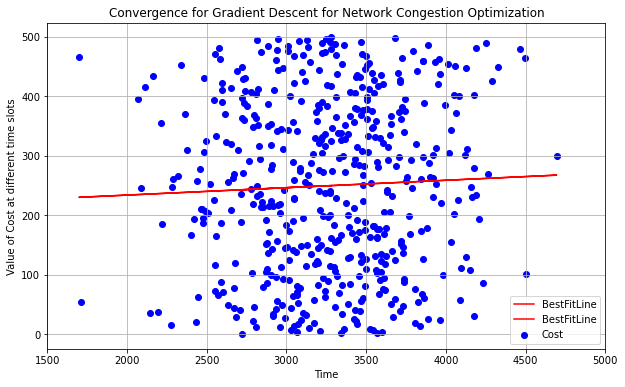

In [1908]:
#Plotting the best fit line for Network Conjestion from Resource Allocation 1
ones_fit_1 = X_1.reshape(len(X_1),1)
X_fit_1 = np.append(ones_fit_1, np.ones((len(X_1),1)), axis = 1)
time_slot_fit_1 = np.arange(time_slot).reshape((time_slot, 1))

# Calculating the parameters using the least square method
theta_1 = np.linalg.inv(X_fit_1.T.dot(X_fit_1)).dot(X_fit_1.T).dot(time_slot_fit_1)

print(f'The parameters of the line: {theta_1}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1

y_line_1 = X_fit_1.dot(theta_1)

plt.scatter(ones_fit_1, time_slot_fit_1, color = 'Blue', label = 'Cost' )
plt.plot(X_fit_1, y_line_1, color = 'Red', label = 'BestFitLine')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Value of Cost at different time slots')
plt.title('Convergence for Gradient Descent for Network Congestion Optimization')
plt.xlim([1500, 5000]) #Gets rid of any outliers for second BestFitLine
plt.legend()
plt.show()

The parameters of the line: [[1.64312916e-04]
 [2.48240565e+02]]


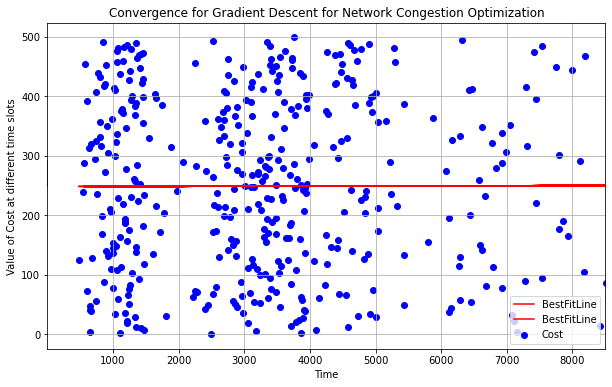

In [1909]:
#Plotting the best fit line for Network Conjestion from Resource Allocation 1
ones_fit_2 = X_2.reshape(len(X_2),1)
X_fit_2 = np.append(ones_fit_2, np.ones((len(X_2),1)), axis = 1)
time_slot_fit_2 = np.arange(time_slot).reshape((time_slot, 1))

# Calculating the parameters using the least square method
theta_2 = np.linalg.inv(X_fit_2.T.dot(X_fit_2)).dot(X_fit_2.T).dot(time_slot_fit_2)

print(f'The parameters of the line: {theta_2}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1

y_line_2 = X_fit_2.dot(theta_2)

plt.scatter(ones_fit_2, time_slot_fit_2, color = 'Blue', label = 'Cost' )
plt.plot(X_fit_2, y_line_2, color = 'Red', label = 'BestFitLine')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Value of Cost at different time slots')
plt.title('Convergence for Gradient Descent for Network Congestion Optimization')
plt.xlim([1, 8500]) #Gets rid of any outliers for second BestFitLine
plt.legend()
plt.show()

In [1910]:
X_val_1_DC1 = np.zeros(time_slot)
X_val_1_DC2 = np.zeros(time_slot)
X_val_1_DC3 = np.zeros(time_slot)

X_val_2_DC1 = np.zeros(time_slot)
X_val_2_DC2 = np.zeros(time_slot)
X_val_2_DC3 = np.zeros(time_slot)

for i in range(len(X_val_1)):
    X_val_1_DC1[i] = X_val_1[i][0]
    X_val_1_DC2[i] = X_val_1[i][1]
    X_val_1_DC3[i] = X_val_1[i][2]

for i in range(len(X_val_2)):
    X_val_2_DC1[i] = X_val_2[i][0]
    X_val_2_DC2[i] = X_val_2[i][1]
    X_val_2_DC3[i] = X_val_2[i][2]


In [1911]:
M = time_slot
Ones_T = np.ones((M,1))
Y_T_1 = X_1
Y_T_2 = X_2

X_val_1_DC1 = X_val_1_DC1.reshape(M,1)
X_val_1_DC2 = X_val_1_DC2.reshape(M,1)
X_val_1_DC3 = X_val_1_DC3.reshape(M,1)
Y_T_1 = Y_T_1.reshape(M,1)

X_val_2_DC1 = X_val_2_DC1.reshape(M,1)
X_val_2_DC2 = X_val_2_DC2.reshape(M,1)
X_val_2_DC3 = X_val_2_DC3.reshape(M,1)
Y_T_2 = Y_T_2.reshape(M,1)

X_T_1 = np.hstack((Ones_T, X_val_1_DC1, X_val_1_DC2, X_val_1_DC3))
print(X_T_1)

X_T_2 = np.hstack((Ones_T, X_val_2_DC1, X_val_2_DC2, X_val_2_DC3))
print(X_T_2)


Y_T_1 = np.hstack((Ones_T,Y_T_1))
Y_T_2 = np.hstack((Ones_T,Y_T_2))

[[1.00000000e+00 6.88921394e+02 1.56462541e+03 4.70453194e+02]
 [1.00000000e+00 8.76151630e+02 1.83147865e+03 6.37369721e+02]
 [1.00000000e+00 9.44850785e+02 1.92543416e+03 6.99715054e+02]
 ...
 [1.00000000e+00 7.54755710e+02 1.66072958e+03 5.28514707e+02]
 [1.00000000e+00 9.79459219e+02 1.97228540e+03 7.31255381e+02]
 [1.00000000e+00 8.56980004e+02 1.80496780e+03 6.20052196e+02]]
[[1.00000000e+00 1.04800000e+03 7.19000000e+02 7.34000000e+02]
 [1.00000000e+00 1.11100000e+03 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.87200000e+03 0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 5.80940000e+04 2.30479145e-07 2.07329094e-07]
 [1.00000000e+00 5.91990000e+04 8.59999999e+02 7.63999995e+02]
 [1.00000000e+00 6.24999998e+02 1.52600000e+03 1.60800001e+03]]


In [1912]:
scalar = StandardScaler()

X_T_1 = scalar.fit_transform(X_T_1)
Y_T_1 = scalar.fit_transform(Y_T_1)
Y_Ts_1 = np.zeros(M)

X_T_2 = scalar.fit_transform(X_T_2)
Y_T_2 = scalar.fit_transform(Y_T_2)
Y_Ts_2 = np.zeros(M)

for i in range(time_slot):
    Y_Ts_1[i] = (Y_T_1[i][1])

for i in range(time_slot):
    Y_Ts_2[i] = (Y_T_2[i][1])
Y_Ts_2

array([-2.65032306e-01, -3.36373328e-01, -1.94666450e-01, -2.59628969e-02,
       -3.60136561e-01, -2.29977689e-01, -3.17537245e-01, -1.83375065e-01,
        7.59161881e-02,  2.57964105e-01, -3.20206118e-01, -1.58123423e-01,
       -3.24055454e-01, -2.03186313e-01,  3.88085919e-02,  5.13867942e-01,
        1.49878464e+00,  1.65773654e+00, -2.36855169e-01, -3.30676311e-01,
       -1.98618434e-01, -2.86830937e-02, -3.31292205e-01, -1.96770753e-01,
        4.77390507e-02,  5.47331501e-01,  7.82038330e-01, -1.93742609e-01,
       -3.24466050e-01, -1.36156547e-01, -3.00702817e-01, -1.50270778e-01,
       -2.99662060e-02, -3.40120015e-01, -1.41391644e-01, -3.32934588e-01,
       -2.40088611e-01, -7.92377031e-02, -1.91946252e-01, -3.59418018e-01,
       -1.92510822e-01, -3.59777289e-01, -2.69754158e-01, -7.81598890e-02,
        1.08250608e-01, -2.11808825e-01, -2.44759138e-01, -3.60187885e-01,
       -2.67803828e-01, -1.14497618e-01, -2.46452846e-01, -3.29855120e-01,
       -2.27052194e-01, -

In [1913]:
#Making a theta array with initializations of O and setting validation parameters.
theta_1 = np.zeros(4)
theta_2 = np.zeros(4)
iterations = time_slot
alpha = 0.001 #This is to avoid getting overfill error.

result_1 = calculate_scalar(X_T_1, Y_Ts_1, theta_1, M)
print('Scalar value for result 1 is ', result_1 ) #Print the scalar value for Gradient Descent

result_2 = calculate_scalar(X_T_2, Y_Ts_2, theta_2, M)
print('Scalar value for result 2 is ', result_2 ) #Print the scalar value for Gradient Descent


#Calculating gradient descent with theta and scalar J for validation set
theta, result_1, theta_interval = gradient_descent(X_T_1, Y_Ts_1, theta, alpha, iterations, M)
print('Final value of theta_1 =', theta_1)
print('Y_1 = ', result_1)

#Calculating gradient descent with theta and scalar J for validation set
theta, result_2, theta_interval = gradient_descent(X_T_2, Y_Ts_2, theta, alpha, iterations, M)
print('Final value of theta_2 =', theta_2)
print('Y_2 = ', result_2)

Scalar value for result 1 is  0.5
Scalar value for result 2 is  0.5000000000000001
Final value of theta_1 = [0. 0. 0. 0.]
Y_1 =  [2.95741070e-04 2.94343674e-04 2.92954645e-04 2.91573932e-04
 2.90201486e-04 2.88837257e-04 2.87481196e-04 2.86133255e-04
 2.84793383e-04 2.83461535e-04 2.82137660e-04 2.80821712e-04
 2.79513642e-04 2.78213405e-04 2.76920952e-04 2.75636238e-04
 2.74359215e-04 2.73089839e-04 2.71828062e-04 2.70573840e-04
 2.69327127e-04 2.68087879e-04 2.66856051e-04 2.65631597e-04
 2.64414475e-04 2.63204640e-04 2.62002049e-04 2.60806657e-04
 2.59618423e-04 2.58437303e-04 2.57263254e-04 2.56096235e-04
 2.54936203e-04 2.53783116e-04 2.52636933e-04 2.51497613e-04
 2.50365113e-04 2.49239394e-04 2.48120415e-04 2.47008136e-04
 2.45902516e-04 2.44803515e-04 2.43711094e-04 2.42625214e-04
 2.41545835e-04 2.40472918e-04 2.39406425e-04 2.38346317e-04
 2.37292556e-04 2.36245105e-04 2.35203924e-04 2.34168977e-04
 2.33140226e-04 2.32117634e-04 2.31101165e-04 2.30090782e-04
 2.29086447e-04 2

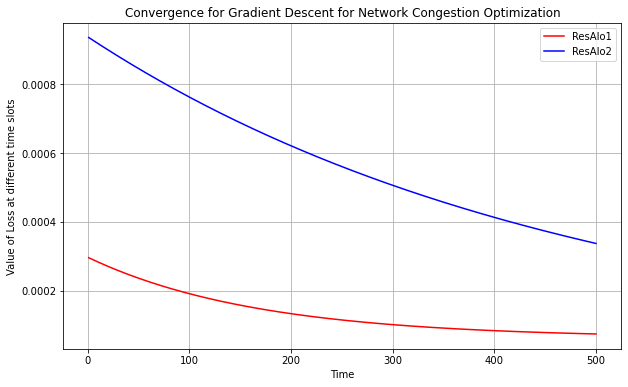

In [1914]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), result_1, color='Red', label = 'ResAlo1' )
plt.plot(range(1, iterations + 1), result_2, color='Blue', label = 'ResAlo2' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Value of Loss at different time slots')
plt.title('Convergence for Gradient Descent for Network Congestion Optimization')
plt.legend()
plt.show()